In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\FILES\Blearn\dataanalytics\project\smartphone_data_analysis\Smartphones_cleaned_dataset.csv")

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    int64  

In [5]:
data = data.drop_duplicates()

In [6]:
data.shape

(980, 26)

In [7]:
data.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [8]:
print(data[['model', 'rating']].to_string())

                                                  model  rating
0                                         OnePlus 11 5G    89.0
1                             OnePlus Nord CE 2 Lite 5G    81.0
2                                 Samsung Galaxy A14 5G    75.0
3                                  Motorola Moto G62 5G    81.0
4                                    Realme 10 Pro Plus    82.0
5               Samsung Galaxy F23 5G (6GB RAM + 128GB)    80.0
6                                       Apple iPhone 14    81.0
7                         Xiaomi Redmi Note 12 Pro Plus    86.0
8                                       Nothing Phone 1    85.0
9                                    OnePlus Nord 2T 5G    84.0
10                                        Realme 10 Pro    82.0
11                                             Oppo A78    79.0
12                          Xiaomi Redmi Note 12 Pro 5G    79.0
13                         Vivo T1 5G (6GB RAM + 128GB)    80.0
14                          Samsung Gala

In [9]:
# for column in data.columns:
#     if data[column].dtype == 'float' or data[column].dtype == 'int':
#         data[column] = data[column].fillna(data[column].median()) 
#     else:
#         data[column] = data[column].fillna(data[column].mode())

In [10]:
data.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [11]:
data['price_category'] = pd.cut(
    data["price"],
    bins=[0, 15000, 30000, 50000, 75000, np.inf],
    labels=['budget', 'mid', 'upper_mid', 'premium', 'ultra_premium']
)

In [12]:
print(data[["model","rating","price",'price_category']].to_string())

                                                  model  rating   price price_category
0                                         OnePlus 11 5G    89.0   54999        premium
1                             OnePlus Nord CE 2 Lite 5G    81.0   19989            mid
2                                 Samsung Galaxy A14 5G    75.0   16499            mid
3                                  Motorola Moto G62 5G    81.0   14999         budget
4                                    Realme 10 Pro Plus    82.0   24999            mid
5               Samsung Galaxy F23 5G (6GB RAM + 128GB)    80.0   16999            mid
6                                       Apple iPhone 14    81.0   65999        premium
7                         Xiaomi Redmi Note 12 Pro Plus    86.0   29999            mid
8                                       Nothing Phone 1    85.0   26749            mid
9                                    OnePlus Nord 2T 5G    84.0   28999            mid
10                                        R

In [13]:
print(data.describe())

               price      rating   num_cores  processor_speed  \
count     980.000000  879.000000  974.000000       938.000000   
mean    32520.504082   78.258248    7.772074         2.427217   
std     39531.812669    7.402854    0.836845         0.464090   
min      3499.000000   60.000000    4.000000         1.200000   
25%     12999.000000   74.000000    8.000000         2.050000   
50%     19994.500000   80.000000    8.000000         2.300000   
75%     35491.500000   84.000000    8.000000         2.840000   
max    650000.000000   89.000000    8.000000         3.220000   

       battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
count        969.000000               980.000000     769.000000    980.000000   
mean        4817.748194                 0.854082      46.126138      6.560204   
std         1009.540054                 0.353205      34.277870      2.744378   
min         1821.000000                 0.000000      10.000000      1.000000   
25%      

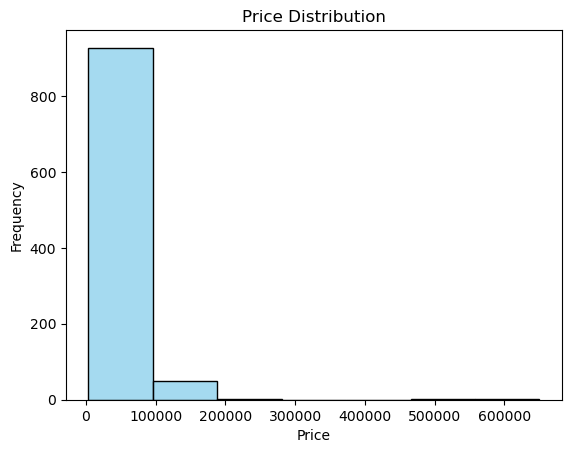

In [14]:

# Price distribution
sns.histplot(data=data['price'], bins=7, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

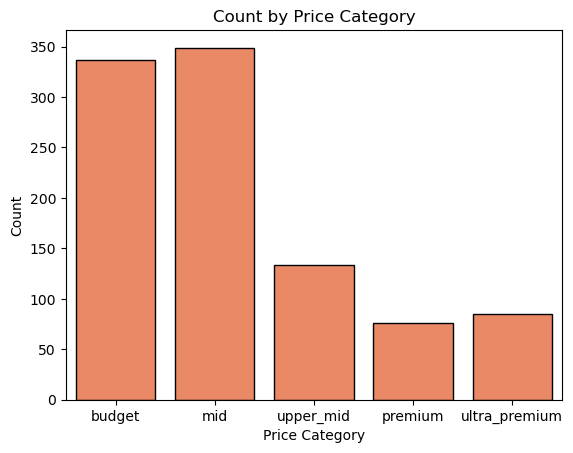

In [15]:

# Price category count
price_cat_counts = data['price_category'].value_counts()

sns.barplot(
    x=price_cat_counts.index,
    y=price_cat_counts.values,
    color='coral',
    edgecolor='black'
)

plt.title('Count by Price Category', fontsize=12)
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()


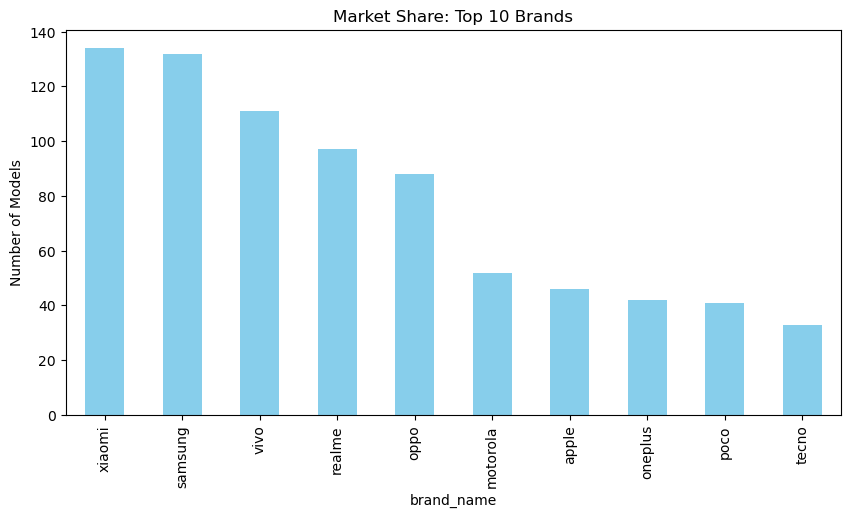

In [16]:
plt.figure(figsize=(10, 5))
data['brand_name'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Market Share: Top 10 Brands')
plt.ylabel('Number of Models')
plt.show()

Xiaomi and Samsung lead in terms of the number of models avail

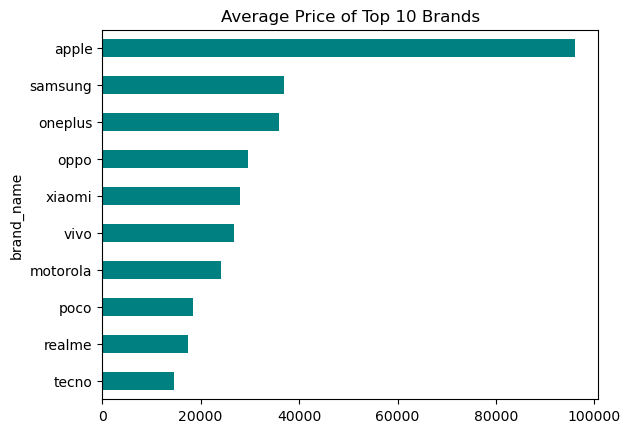

In [17]:
top_10_brands = data['brand_name'].value_counts().head(10).index
avg_price = data[data['brand_name'].isin(top_10_brands)].groupby('brand_name')['price'].mean().sort_values()
avg_price.plot(kind='barh', color='teal')
plt.title('Average Price of Top 10 Brands')
plt.show()

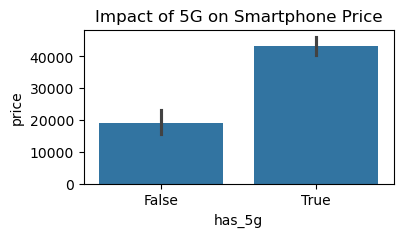

In [18]:
plt.figure(figsize=(4, 2))
sns.barplot(data=data, x='has_5g', y='price')
plt.title('Impact of 5G on Smartphone Price')
plt.show()

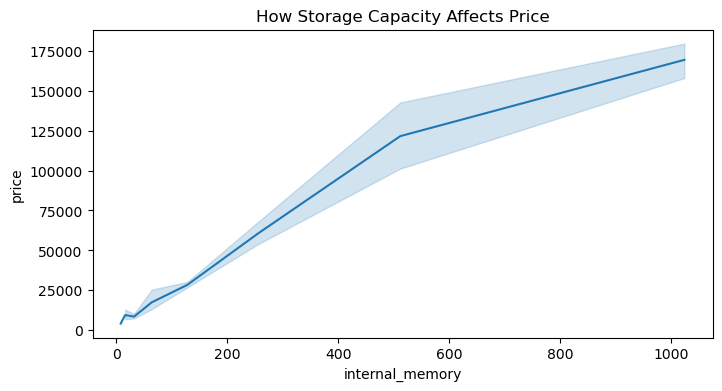

In [19]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=data, x='internal_memory', y='price')
plt.title('How Storage Capacity Affects Price')
plt.show()

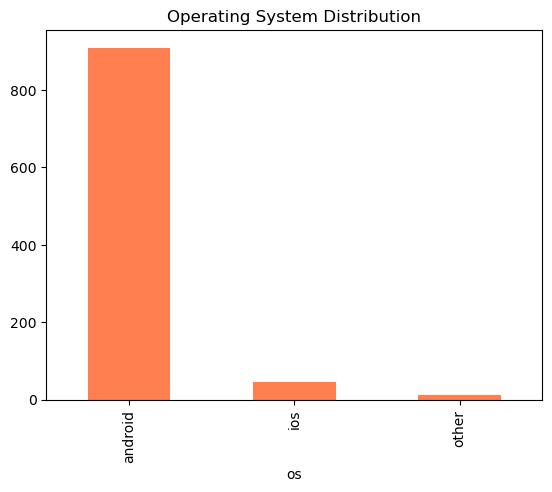

In [20]:
data['os'].value_counts().plot(kind='bar', color='coral')
plt.title('Operating System Distribution')
plt.show()

In [21]:
oneplus = data.groupby('brand_name').get_group('oneplus')

In [27]:
oneplus

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height,price_category
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,...,3,1.0,android,50.0,16.0,0,NaN,1440,3216,premium
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.20,...,3,1.0,android,64.0,16.0,1,1024.0,1080,2412,mid
9,oneplus,OnePlus Nord 2T 5G,28999,84.0,True,True,False,dimensity,8.0,3.00,...,3,1.0,android,50.0,32.0,0,NaN,1080,2400,mid
18,oneplus,OnePlus 10R 5G,32999,86.0,True,True,False,dimensity,8.0,2.85,...,3,1.0,android,50.0,16.0,0,NaN,1080,2412,upper_mid
20,oneplus,OnePlus 11R,39999,85.0,True,True,False,snapdragon,8.0,3.20,...,3,1.0,android,50.0,16.0,0,NaN,1080,2412,upper_mid
26,oneplus,OnePlus Nord CE 2 Lite 5G (8GB RAM + 128GB),21995,84.0,True,False,False,snapdragon,8.0,2.20,...,3,1.0,android,64.0,16.0,1,1024.0,1080,2412,mid
29,oneplus,OnePlus 11 Pro,69999,NaN,True,True,False,snapdragon,8.0,3.20,...,3,1.0,android,50.0,16.0,0,NaN,1440,3216,premium
40,oneplus,OnePlus Nord CE 3 5G,21999,83.0,True,True,False,snapdragon,8.0,2.20,...,3,1.0,android,108.0,16.0,1,1024.0,1080,2412,mid
66,oneplus,OnePlus 10 Pro 5G,60999,89.0,True,True,False,snapdragon,8.0,3.00,...,3,1.0,android,50.0,32.0,0,NaN,1440,3216,premium
73,oneplus,OnePlus 10T,44999,85.0,True,True,False,snapdragon,8.0,3.20,...,3,1.0,android,50.0,16.0,0,NaN,1080,2412,upper_mid


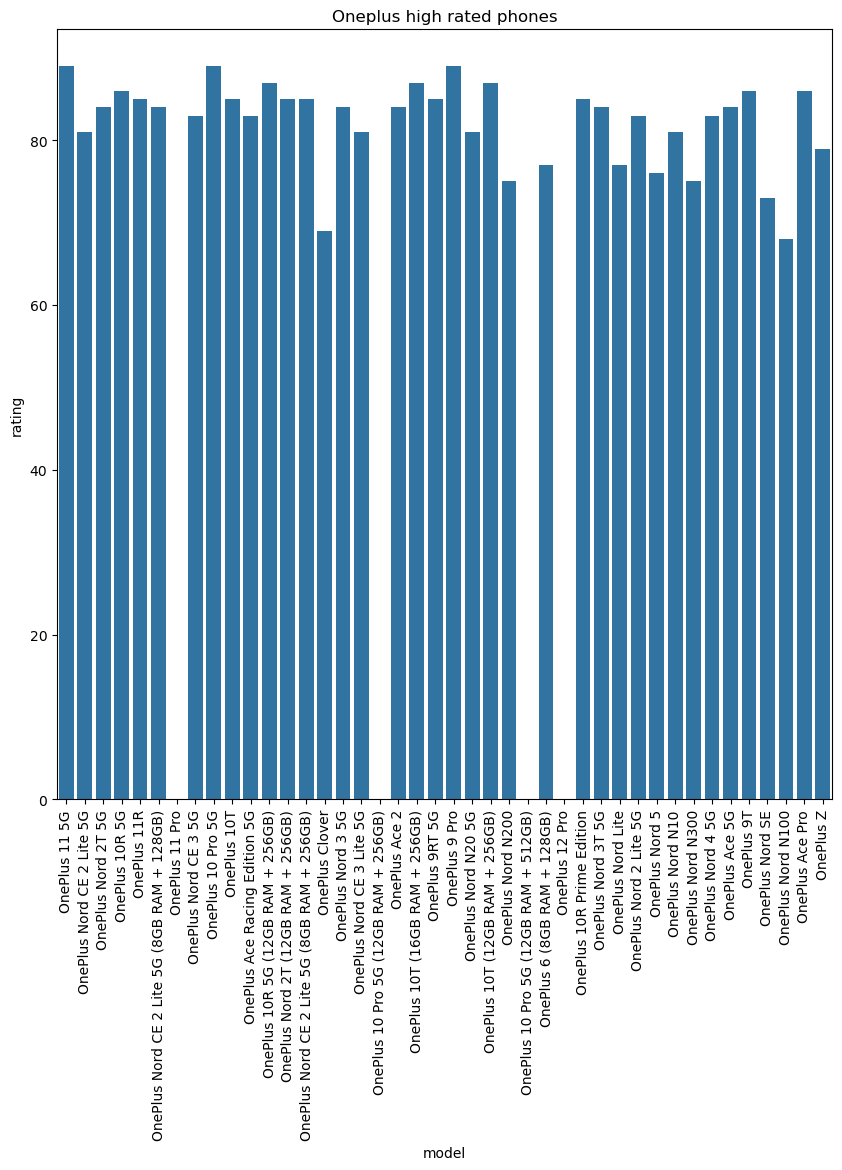

In [42]:
plt.figure(figsize=(10,10))
sns.barplot(data=oneplus, x='model', y='rating')
plt.title('Oneplus high rated phones')
plt.xticks(rotation=90)
plt.show()

In [36]:
oneplus_top = oneplus.sort_values(by='rating', ascending=False).head(10)

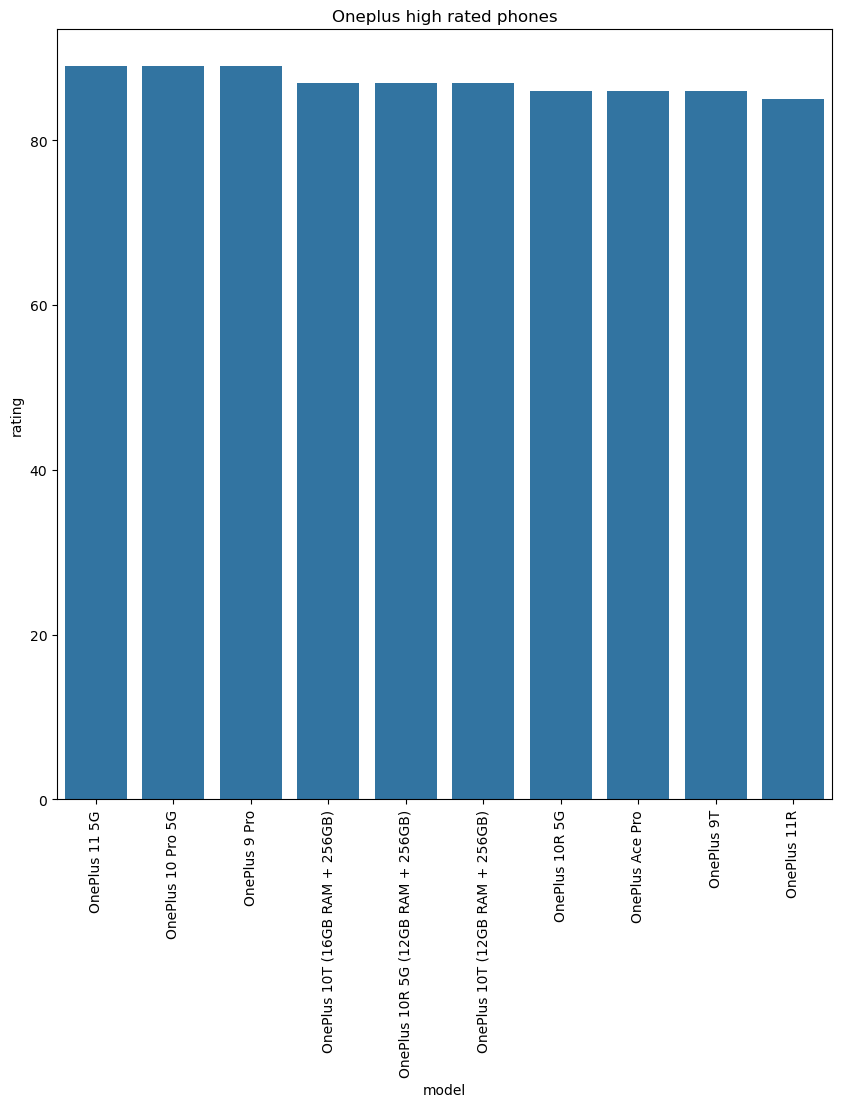

In [40]:
plt.figure(figsize=(10,10))
sns.barplot(data=oneplus_top, x='model', y='rating')
plt.title('Oneplus high rated phones')
plt.xticks(rotation=90)
plt.show()

# highest review in oneplus phone is Oneplus 11 5g

-----

In [43]:
max_rated = data['rating'].max() #find the max rating in the dataset

higest_rated_phones = data[data['rating'] == max_rated]

rated_phone = higest_rated_phones[["brand_name", "model", "rating"]]

print(rated_phone.to_string())



    brand_name                                    model  rating
0      oneplus                            OnePlus 11 5G    89.0
58     samsung                  Samsung Galaxy S23 Plus    89.0
66     oneplus                        OnePlus 10 Pro 5G    89.0
120   motorola                  Motorola Edge 30 Pro 5G    89.0
180    infinix                       Infinix Zero Ultra    89.0
182   motorola                        Motorola Moto X40    89.0
230       iqoo                           iQOO 11 Pro 5G    89.0
239     xiaomi            Xiaomi Redmi Note 12 Explorer    89.0
250      tecno                     Tecno Phantom X2 Pro    89.0
263    samsung     Samsung Galaxy A53 (8GB RAM + 256GB)    89.0
270     google                       Google Pixel 6 Pro    89.0
274     xiaomi                         Xiaomi 12 Pro 5G    89.0
296     xiaomi                             Xiaomi 13 5G    89.0
310    samsung  Samsung Galaxy A53 5G (8GB RAM + 128GB)    89.0
318       iqoo               iQOO 11 (16

In [49]:
rated_phone.head(10)

,brand_name,model,rating
0,oneplus,OnePlus 11 5G,89.0
58,samsung,Samsung Galaxy S23 Plus,89.0
66,oneplus,OnePlus 10 Pro 5G,89.0
120,motorola,Motorola Edge 30 Pro 5G,89.0
180,infinix,Infinix Zero Ultra,89.0
182,motorola,Motorola Moto X40,89.0
230,iqoo,iQOO 11 Pro 5G,89.0
239,xiaomi,Xiaomi Redmi Note 12 Explorer,89.0
250,tecno,Tecno Phantom X2 Pro,89.0
263,samsung,Samsung Galaxy A53 (8GB RAM + 256GB),89.0


# higest overall rated phone is oneplus 11 5g
